<a href="https://colab.research.google.com/github/Mechanics-Mechatronics-and-Robotics/ML-2024/blob/main/LSTM_toyDataset_vol2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# One output model

Epoch 0 Loss 0.002744477242231369 
Performance on test range: 1.4993274211883545
Epoch 1 Loss 0.11398902535438538 
Performance on test range: 5.535391807556152
Epoch 2 Loss 0.0013171342434361577 
Performance on test range: 0.6382561922073364
Epoch 3 Loss 0.09754537791013718 
Performance on test range: 1.0374929904937744
Epoch 4 Loss 0.001329986727796495 
Performance on test range: 0.22366467118263245
Epoch 5 Loss 0.001143373316153884 
Performance on test range: 0.08171160519123077
Epoch 6 Loss 0.006352000869810581 
Performance on test range: 0.3414614200592041
Epoch 7 Loss 0.004971164278686047 
Performance on test range: 0.4559853672981262
Epoch 8 Loss 0.0007939681527204812 
Performance on test range: 0.1258377879858017
Epoch 9 Loss 0.0009002951555885375 
Performance on test range: 0.3451162576675415
Epoch 10 Loss 0.008944890461862087 
Performance on test range: 0.5204640626907349
Epoch 11 Loss 0.0020691026002168655 
Performance on test range: 1.8333866596221924
Epoch 12 Loss 0.0015640

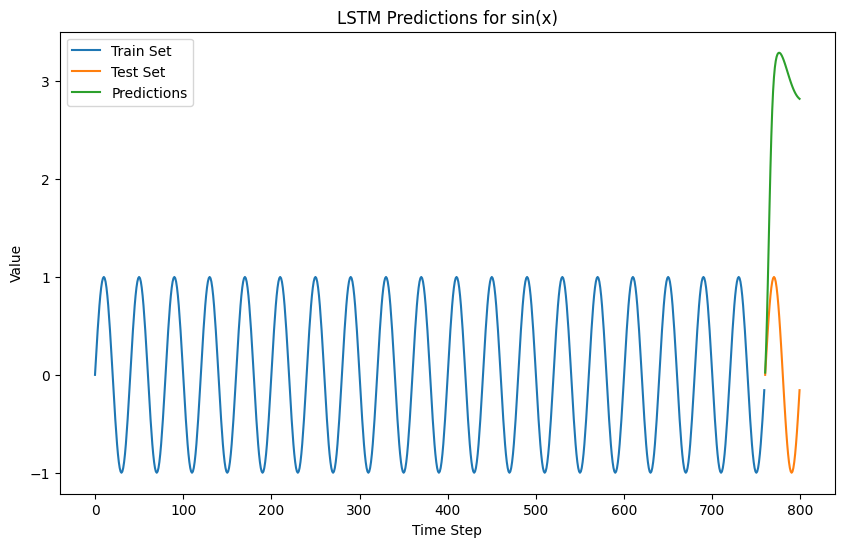

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Function to create input data
def input_data(seq, ws):
    output = []
    L = len(seq)
    for i in range((L) - ws):
        window = seq[i:i+ws]
        label = seq[i+ws:i+ws+1]
        output.append((window, label))
    return output

# LSTM model class
class myLSTM(nn.Module):
    def __init__(self, input_size=1, hidden_size=50, out_size=1):
        super().__init__()
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size, hidden_size)
        self.linear = nn.Linear(hidden_size, out_size)
        self.hidden = (torch.zeros(1,1,hidden_size), torch.zeros(1,1,hidden_size))

    def forward(self, seq):
        lstm_out, self.hidden = self.lstm(seq.view(len(seq), 1, -1), self.hidden)
        pred = self.linear(lstm_out.view(len(seq), -1))
        return pred[-1]

# Generate data
x = torch.linspace(0, 799, 800)
y = torch.sin(x * 2 * np.pi / 40)

# Split data into train and test sets
test_size = 40
train_set = y[:-test_size]
test_set = y[-test_size:]

# Create input data
window_size = 40
train_data = input_data(train_set, window_size)

# Initialize model, criterion, and optimizer
model = myLSTM(input_size=1, hidden_size=50, out_size=1)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 50
future = test_size
for i in range(epochs):
    for seq, y_train in train_data:
        optimizer.zero_grad()
        model.hidden = (torch.zeros(1,1,model.hidden_size), torch.zeros(1,1,model.hidden_size))

        y_pred = model(seq)
        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()

    print(f"Epoch {i} Loss {loss.item()} ")
    preds = train_set[-window_size:].tolist()

    for f in range(future):
        seq = torch.FloatTensor(preds[-window_size:])
        with torch.no_grad():
            model.hidden = (torch.zeros(1,1,model.hidden_size), torch.zeros(1,1,model.hidden_size))
            preds.append(model(seq).item())

    loss = criterion(torch.tensor(preds[-window_size:]), y[760:])
    print(f'Performance on test range: {loss}')

# Final predictions
preds = train_set[-window_size:].tolist()
for f in range(future):
    seq = torch.FloatTensor(preds[-window_size:])
    with torch.no_grad():
        model.hidden = (torch.zeros(1,1,model.hidden_size), torch.zeros(1,1,model.hidden_size))
        preds.append(model(seq).item())

# Visualize predictions
plt.figure(figsize=(10, 6))
sns.lineplot(x=np.arange(len(train_set)), y=train_set, label='Train Set')
sns.lineplot(x=np.arange(len(train_set), len(train_set) + len(test_set)), y=test_set, label='Test Set')
sns.lineplot(x=np.arange(len(train_set), len(train_set) + len(preds[-future:])), y=preds[-future:], label='Predictions')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.title('LSTM Predictions for sin(x)')
plt.show()

# Two outputs

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([1, 2])) that is different to the input size (torch.Size([2])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 0 Loss 0.019971579313278198 
Performance on test range: 0.6503208875656128
Epoch 1 Loss 0.0010360756423324347 
Performance on test range: 0.04966612905263901
Epoch 2 Loss 0.012581992894411087 
Performance on test range: 0.6928799748420715
Epoch 3 Loss 0.00449119508266449 
Performance on test range: 2.138866901397705
Epoch 4 Loss 0.003262653248384595 
Performance on test range: 0.08128087222576141
Epoch 5 Loss 0.0007612297195009887 
Performance on test range: 0.12622995674610138
Epoch 6 Loss 0.007853633724153042 
Performance on test range: 0.24334418773651123
Epoch 7 Loss 0.0002292668359586969 
Performance on test range: 0.0351368710398674
Epoch 8 Loss 0.0008299192995764315 
Performance on test range: 0.13250112533569336
Epoch 9 Loss 0.00198205653578043 
Performance on test range: 0.045880027115345
Epoch 10 Loss 0.0018629432888701558 
Performance on test range: 0.3206593990325928
Epoch 11 Loss 0.0019541101064532995 
Performance on test range: 0.6233417391777039
Epoch 12 Loss 0.000

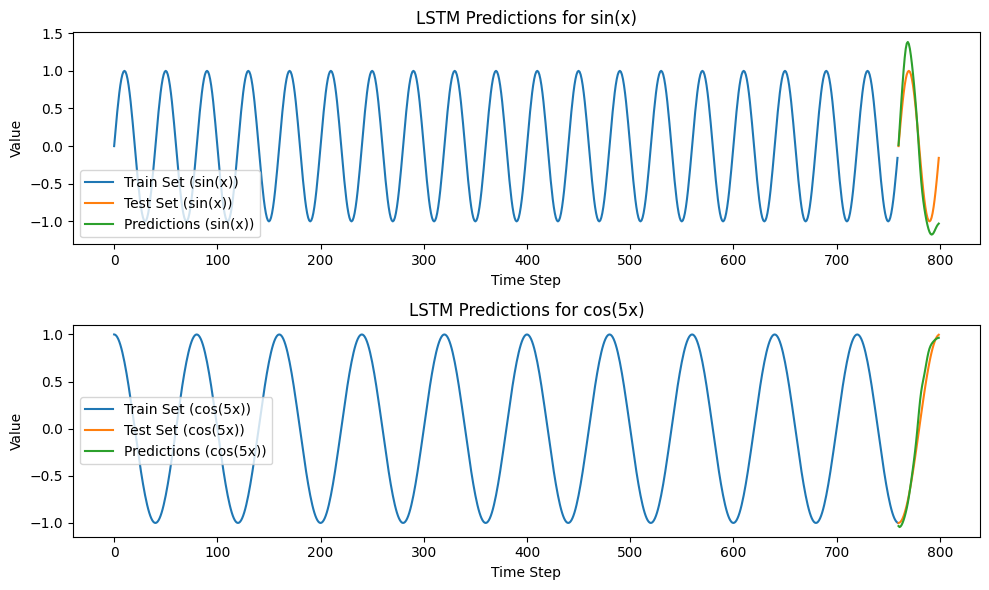

In [2]:


# # Function to create input data
# def input_data(seq, ws):
#     output = []
#     L = len(seq)
#     for i in range((L) - ws):
#         window = seq[i:i+ws]
#         label = seq[i+ws:i+ws+1]
#         output.append((window, label))
#     return output

# # LSTM model class
# class myLSTM(nn.Module):
#     def __init__(self, input_size=1, hidden_size=50, out_size=2):
#         super().__init__()
#         self.hidden_size = hidden_size
#         self.lstm = nn.LSTM(input_size, hidden_size)
#         self.linear = nn.Linear(hidden_size, out_size)
#         self.hidden = (torch.zeros(1,1,hidden_size), torch.zeros(1,1,hidden_size))

#     def forward(self, seq):
#         lstm_out, self.hidden = self.lstm(seq.view(len(seq), 1, -1), self.hidden)
#         pred = self.linear(lstm_out.view(len(seq), -1))
#         return pred[-1]

# Generate data
x = torch.linspace(0, 799, 800)
y_sin = torch.sin(x * 2 * np.pi / 40)
y_cos = torch.cos(x * 1 * np.pi / 40)  # cos(5x)

# Combine sin(x) and cos(5x) into a single tensor
y = torch.stack((y_sin, y_cos), dim=1)

# Split data into train and test sets
test_size = 40
train_set = y[:-test_size]
test_set = y[-test_size:]

# Create input data
window_size = 40
train_data = input_data(train_set, window_size)

# Initialize model, criterion, and optimizer
model = myLSTM(input_size=2, hidden_size=50, out_size=2)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 50
future = test_size
for i in range(epochs):
    for seq, y_train in train_data:
        optimizer.zero_grad()
        model.hidden = (torch.zeros(1,1,model.hidden_size), torch.zeros(1,1,model.hidden_size))

        y_pred = model(seq)
        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()

    print(f"Epoch {i} Loss {loss.item()} ")
    preds = train_set[-window_size:].tolist()

    for f in range(future):
        seq = torch.FloatTensor(preds[-window_size:])
        with torch.no_grad():
            model.hidden = (torch.zeros(1,1,model.hidden_size), torch.zeros(1,1,model.hidden_size))
            preds.append(model(seq).tolist())

    loss = criterion(torch.tensor(preds[-window_size:]), y[760:])
    print(f'Performance on test range: {loss}')

# Final predictions
preds = train_set[-window_size:].tolist()
for f in range(future):
    seq = torch.FloatTensor(preds[-window_size:])
    with torch.no_grad():
        model.hidden = (torch.zeros(1,1,model.hidden_size), torch.zeros(1,1,model.hidden_size))
        preds.append(model(seq).tolist())

# Extract predictions for sin(x) and cos(5x)
preds_sin = [p[0] for p in preds[-future:]]
preds_cos = [p[1] for p in preds[-future:]]

# Visualize predictions
plt.figure(figsize=(10, 6))

# Plot sin(x)
plt.subplot(2, 1, 1)
sns.lineplot(x=np.arange(len(train_set)), y=train_set[:, 0], label='Train Set (sin(x))')
sns.lineplot(x=np.arange(len(train_set), len(train_set) + len(test_set)), y=test_set[:, 0], label='Test Set (sin(x))')
sns.lineplot(x=np.arange(len(train_set), len(train_set) + len(preds_sin)), y=preds_sin, label='Predictions (sin(x))')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.title('LSTM Predictions for sin(x)')

# Plot cos(5x)
plt.subplot(2, 1, 2)
sns.lineplot(x=np.arange(len(train_set)), y=train_set[:, 1], label='Train Set (cos(5x))')
sns.lineplot(x=np.arange(len(train_set), len(train_set) + len(test_set)), y=test_set[:, 1], label='Test Set (cos(5x))')
sns.lineplot(x=np.arange(len(train_set), len(train_set) + len(preds_cos)), y=preds_cos, label='Predictions (cos(5x))')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.title('LSTM Predictions for cos(5x)')

plt.tight_layout()
plt.show()